In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist

(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

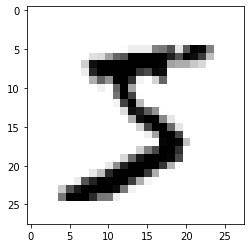

In [4]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#reshape the the arrays of dat to include the numbe of channels
x_train = x_train.reshape(60000,28,28,1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_test = x_test.reshape(10000,28,28,1)

In [10]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [11]:
x_train.max()

1.0

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
#Now hot one encoding is performed to for easier processing of data for the neural network
from keras.utils.np_utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
cat_y_train = to_categorical(y_train,10)
cat_y_test = to_categorical(y_test,10)

In [16]:
cat_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Model:

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = Sequential()

#First the convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

#Now need to flatten the model essentally 2d to 1d
model.add(Flatten())

#Now include the Dense layers
model.add(Dense(128,activation='relu'))

#Finally, the output layer
model.add(Dense(10 , activation ='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [23]:
results=model.fit(x_train,cat_y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0357 - accuracy: 0.9895
Epoch 2/2
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0273 - accuracy: 0.9919


In [26]:
model.evaluate(x_test,cat_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9872


[0.043979547917842865, 0.9872000217437744]

In [27]:
from sklearn.metrics import classification_report

In [28]:
predictions = model.predict_classes(x_test)

/home/amoghavarsha/Project_CNN/my_project_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

